In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from matplotlib_venn import venn3, venn2, venn3_circles
import scipy
import seaborn as sns
%matplotlib inline

In [5]:
path = 'data_among_form.csv'

form = pd.read_csv(path)

In [6]:
display(form)

,Timestamp,lightswitch,Favorite_lucozade,20_mile_route,like_sweets,Favorite_night_out,star_sign?,Would_rather,favourite_colour
0,2024/10/17 2:09:28 pm CET,Clicky light switch,Raspberry,Paraglide,Yes,Festival,Sagittarius,Fingers for Toes,orange
1,2024/10/17 2:09:29 pm CET,Clicky light switch,I've never had a lucozade,Cycle,No,At home :(,Taurus,Fingers for Toes,Blue
2,2024/10/17 2:10:19 pm CET,Twisty light switch,Caribbean Crush,Paraglide,Yes,At home :(,Capricorn,Fingers for Toes,Black
3,2024/10/17 2:12:30 pm CET,Clicky light switch,Raspberry,Cycle,Yes,Intimate Club,Aquarius,Fingers for Toes,hot pink
4,2024/10/17 2:15:32 pm CET,Clicky light switch,Caribbean Crush,Hike,Yes,Concert Hall,Libra,Fingers for Toes,Black
5,2024/10/17 2:56:09 pm CET,Twisty light switch,I'm repulsed by the thought of lucozade why ar...,Paraglide,Yes,Intimate Club,Sagittarius,Fingers for Toes,Lilac
6,2024/10/17 3:48:38 pm CET,Twisty light switch,Blue Force,Paraglide,Yes,At home :(,Libra,Fingers for Toes,Red
7,2024/10/17 4:03:23 pm CET,Twisty light switch,Raspberry,Cycle,Yes,Concert Hall,Gemini,Fingers for Toes,purple
8,2024/10/17 4:04:04 pm CET,Clicky light switch,Orange,Paraglide,Yes,Intimate Club,Gemini,Fingers for Toes,RED
9,2024/10/17 5:02:41 pm CET,Clicky light switch,I've never had a lucozade,Paraglide,Yes,At home :(,Cancer,Fingers for Toes,Blue


Text(0, 0.5, 'Count')

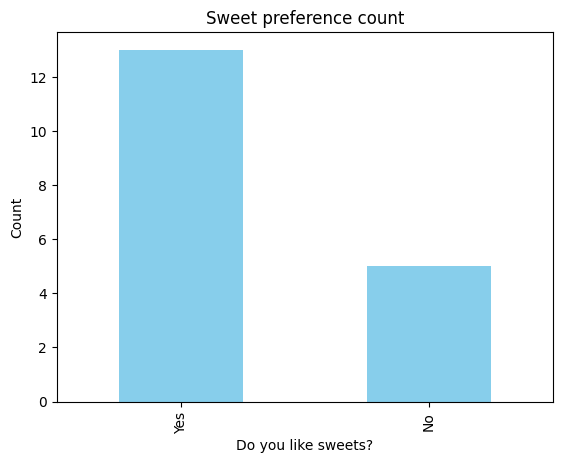

In [13]:
form['like_sweets'].value_counts().plot(kind='bar', color='skyblue')

plt.title('Sweet preference count')

plt.xlabel('Do you like sweets?')

plt.ylabel('Count')

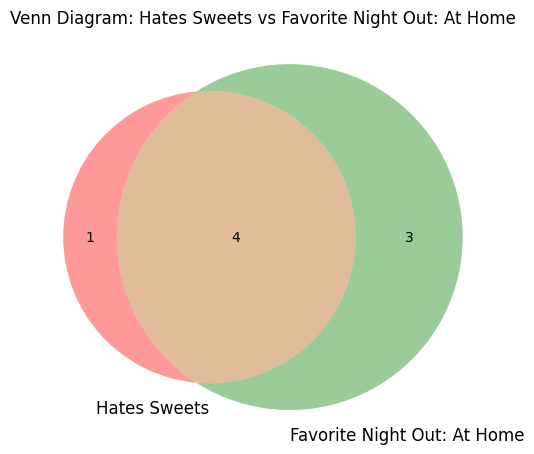

In [16]:
like_sweets_yes = set(form[form['like_sweets'] == 'No'].index)
fav_night_out_at_home = set(form[form['Favorite_night_out'] == 'At home :('].index)

plt.figure(figsize=(6, 6))
venn2([like_sweets_yes, fav_night_out_at_home], set_labels=('Hates Sweets', 'Favorite Night Out: At Home'))

plt.title('Venn Diagram: Hates Sweets vs Favorite Night Out: At Home')

plt.show()

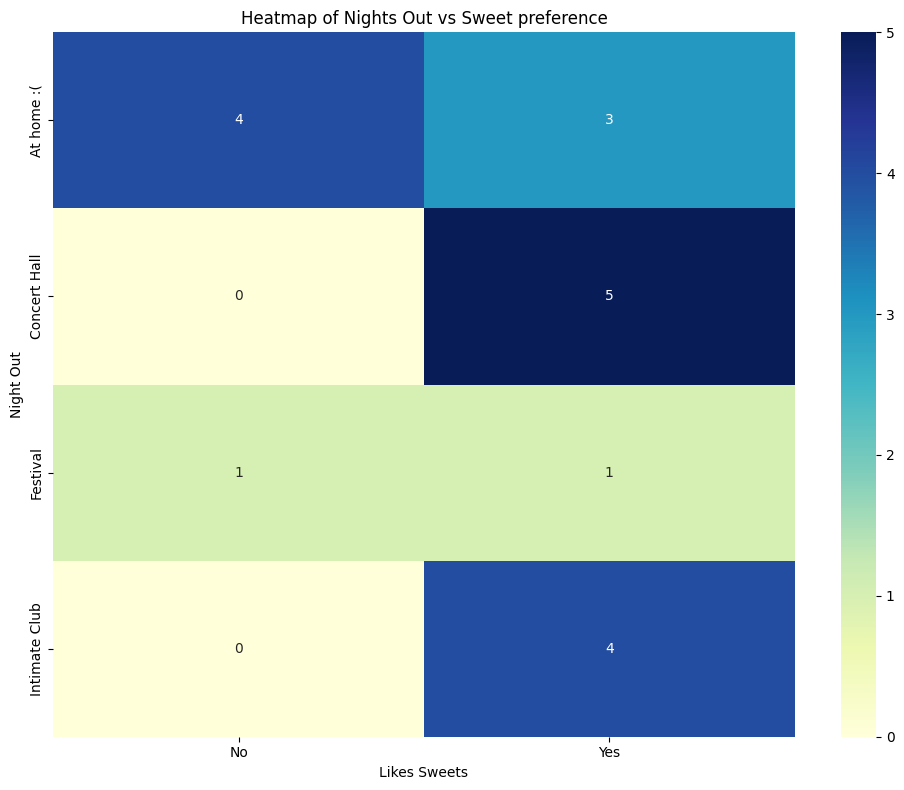

In [17]:
crosstab_data = pd.crosstab(index=[form['Favorite_night_out']],
                            columns=form['like_sweets'])

plt.figure(figsize=(10, 8))

sns.heatmap(crosstab_data, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Nights Out vs Sweet preference')
plt.xlabel('Likes Sweets')
plt.ylabel('Night Out')

plt.tight_layout()
plt.show()

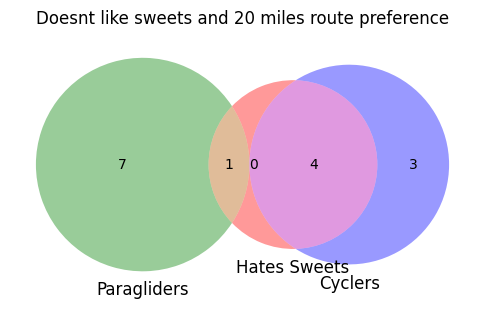

In [22]:
like_sweets_no = set(form[form['like_sweets'] == 'No'].index)
twentymiles_hike = set(form[form['20_mile_route'] == 'Paraglide'].index)
twentymiles_cycle = set(form[form['20_mile_route'] == 'Cycle'].index)

plt.figure(figsize=(6, 6))
venn3([like_sweets_no, twentymiles_hike, twentymiles_cycle], set_labels=('Hates Sweets', 'Paragliders', 'Cyclers'))

plt.title('Doesnt like sweets and 20 miles route preference')

plt.show()

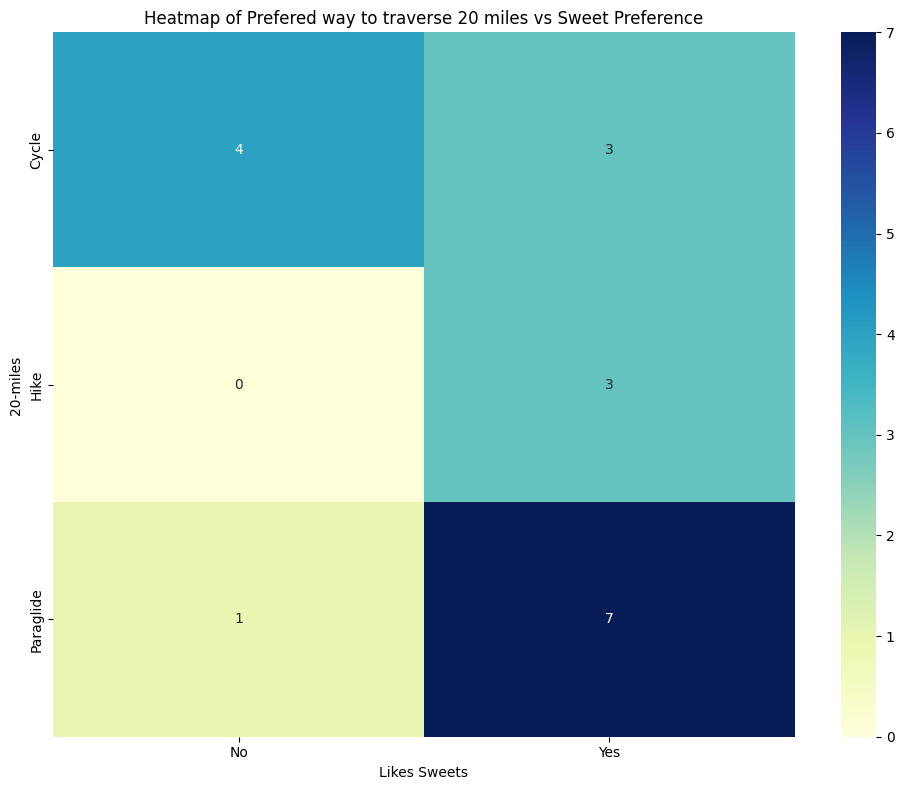

In [19]:
crosstab_data = pd.crosstab(index=[form['20_mile_route']],
                            columns=form['like_sweets'])

plt.figure(figsize=(10, 8))

sns.heatmap(crosstab_data, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Prefered way to traverse 20 miles vs Sweet Preference')
plt.xlabel('Likes Sweets')
plt.ylabel('20-miles ')

plt.tight_layout()
plt.show()

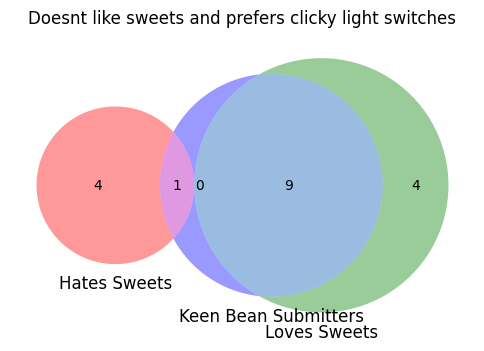

In [12]:
like_sweets_no = set(form[form['like_sweets'] == 'No'].index)
like_sweets_yes = set(form[form['like_sweets'] == 'Yes'].index)
timestamp_seventeen = set(form[form['Timestamp'].str.contains('2024/10/17')].index)

plt.figure(figsize=(6, 6))
venn3([like_sweets_no, like_sweets_yes, timestamp_seventeen], set_labels=('Hates Sweets', 'Loves Sweets', 'Keen Bean Submitters'))

plt.title('Doesnt like sweets and prefers clicky light switches')

plt.show()

<h1>Conclusion</h1>

<p style='font-style: italic; font-weight:bold;'>People who don't like sweets are more likely to:</p>
<ul>
<li>Not want to go on a night out and stay at home</li>
<li>Not submit the survey on the day it was posted</li>
<li>Prefer cycling a 20 mile route over any other options</li>
</ul>
